# מדידת השפעות תרבותיות דרך ארכיטקטורה

מאת יובל יפה ומיכאל ללוש

## מטרת הפרויקט

בפרוייקט זה אנו מעוניינים למדוד השפעות תרבותיות באזורים גיאוגרפים שונים בעזרת בדיקת התפשטותם של סגנונות ארכיטקטורה. תוכניתינו היא לאמן מסווג של סגנונות ארכיטקטורה שונים, ולאחר מכן בעזרתו לבדוק את הסגנונות הנפוצים במקומות שונים בעולם, בעזרת
<br>google street view. <br>
ברמה האלגוריתמיקאית אנו רוצים לראות שהפרוייקט יזהה תחילה זרמים תרבותיים היסטורים למשל הסגנונות של ימי הביניים, ארכיטקטורה מוסלמית במזרח התיכון ועד ספרד, עד השפעות קולוניאליות במזרח הרחוק ואמריקה. 
בהמשך אנו מקווים לראות זרמים שלא נבעו מתנועה של אנשים (למשל קולוניאליזם) אלא גם תנועה של רעיון או חידושו.
למשל אנו מקווים לראות את השימושים בעקרונות ארכיטקטורה יוונית ורומית עתיקה במבנים חדשים יותר, כדוגמא בבית הלבן
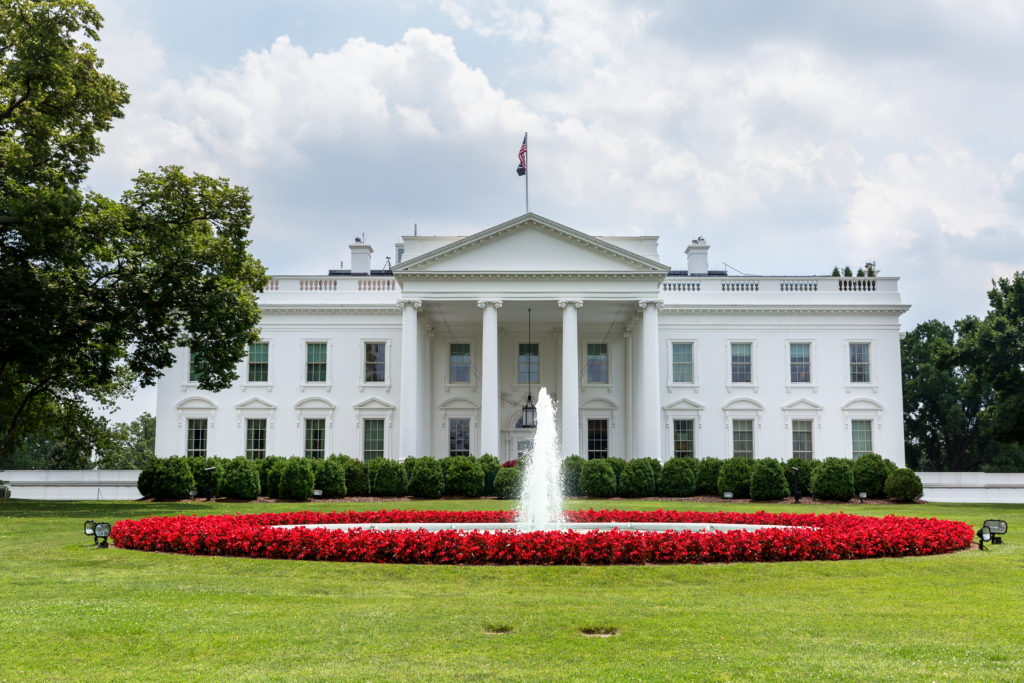
לכן כאשר נסרוק תמונות של בניינים מהעולם, אנו נרצה לדעת את כל הסגנונות שהשפיעו על הבניין בתמונה - ולכן לא רק נשמור את המחלקה שהתמונה סווגה אליה, אלא את כל המחלקות שהמסווג האמין שנכללות מעל רף מסוים. 

לאחר איסוף הנתונים וסיווגו, אנו נראה את המידע במפת חום עולמית שתשתמש בצבעים שונים על מנת להציג כל סגנון והתפשטותו בעולם.
על מנת להציג את בבירור את ההשפעות המפה גם תציג את ההתגלגלות של הסגנונות. למשל כיוון שסגנון הרנסאנס הוביל לסגנון הברוק, כאשר המפה תציג את הפיזור הגיאוגרפי של ארכיטקטורת רנסאס היא גם תציג את הפיזור של ברוק.

לבסוף, אם נמצא מידע שכולל מבנים ושנת הקמתם נוכל להוסיף למפה מצב של ציר זמן. במצב זה מפת החום תושפע רק מהמבנים שאנו יודעים את שנת הקמתן. 

## המידע שנעבוד איתו

תחילה בחרנו את קבוצת הסגנונות שנרצה לזהות. כמו כן הוספנו להן מידע נוסף כמו שנת התחלה, ומאיזה סגנון הוא הושפע.

In [7]:
import pandas as pd
data = pd.read_csv('../data/architectural_styles.csv')
data.head(10)

,id,class,subclass,subclass2,start year,influenced by,additional search terms
0,1.0,ancient greek,NaN,NaN,-900.0,NaN,NaN
1,2.0,ancient india,NaN,NaN,-800.0,NaN,gupta
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,roman,NaN,NaN,-500.0,ancient greek,ancient roman
4,4.0,byzantine,NaN,NaN,330.0,roman,NaN
5,5.0,islamic,malmuk,NaN,1250.0,NaN,NaN
6,6.0,islamic,ottoman,NaN,1299.0,"malmuk, byzantine",NaN
7,7.0,islamic,mughal,NaN,1556.0,"ancient indian, islamic",NaN
8,8.0,medieval,romanesque,NaN,500.0,roman,NaN
9,9.0,medieval,gothic,NaN,1150.0,romanesque,NaN


כמו כן לכל מחלקה יכולות להיות תת-מחלקות. מטרת חלוקה זו היא לאפשר להחליט באיזו רמת דיוק נרצה את המסווג שלנו. למשל אם נראה שהמסווג לא מצליח להבדיל בין סגנון מלמוק לסגנון עותמאני, אז נאחד אותם למחלקה של סגנון מוסלמי.
 בצורה גרפית המחלקות שלנו מחולקות כך:
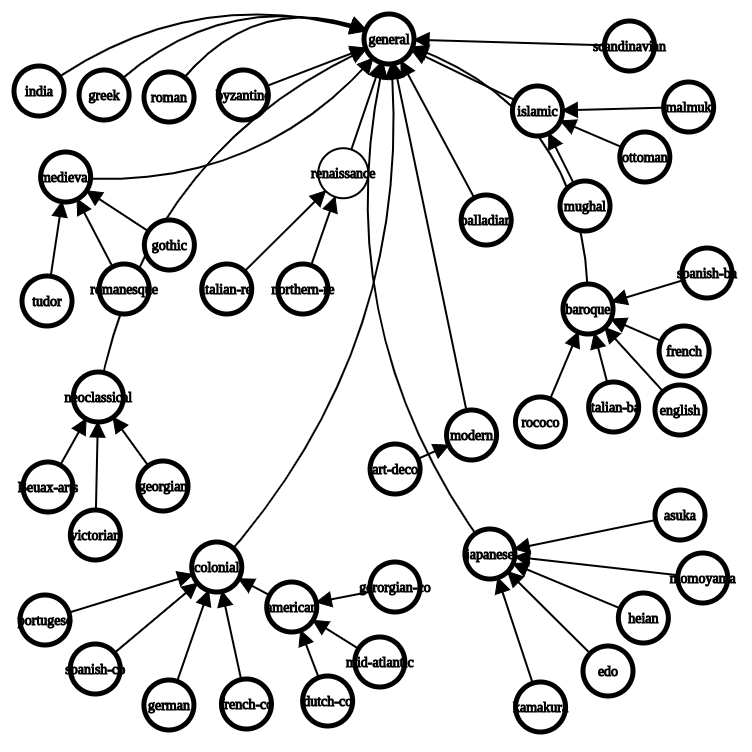

 המידע שאנו נשתמש בו הוא 
 google images
 אנו נשמור כתובות לתמונות שנמצא מחיפושים לפי הסגנונות

In [8]:
lines = open('../data/urls/baroque/english baroque/images.txt', 'r').read().splitlines()
lines[:3]

['https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQW0q8TuWjFGcaUCOy2gxGcf__niVS_EniX_rNpYQ_jGMJfJTTU&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRUd1U-rbkih8siQV8y7f1tG4aAJhN3r34qbyhYGfVpCTS_3KBo&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQNljC6ZCFeDRqbMPrXMGQeER3FubI7ubf_gh_N93E4LcFEcVpU&usqp=CAU']

עבור בניית ציר הזמן אנו נצטרך מקור מידע נוסף - אחד שכולל בו תמונות של מבנים ושנות הקמתם. התכנית הנוכחית כוללת לשלוף את מידע זה מויקיפדיה.

## תוצאות ראשוניות

עבור התמונות שנאספו והמחלקות העדינות ביותר (כלומר כמה שיותר מחלקות), מסווג שאומן בעזרת הספרייה fast-ai שהתבסס על מודל מאומן של
resnet34
הגיע לדיוק של 40% על התמונות.
אחד הקשיים שגורמים לביצועים אלה הוא איכות המידע. חוץ מתמונות של מבנים מבחוץ, הוא כולל תמונות של פנים המבנה, ורישומים ארכיטקטורים.
למשל עבור המחלקה של ברוק צרפתי קיימות התמונות
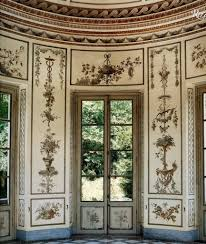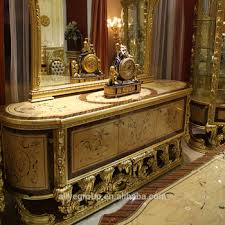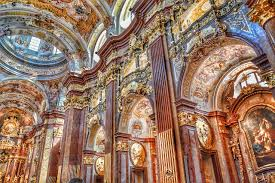
לכן עלינו להוציא את תמונות אלה.
לשם כך אימנו עוד רשת שתפקידה היחיד הוא להבדיל בין תמונות של בתים בחוץ מול תמונות של בתים מבפנים. כמו כן הוספנו תמונות כלליות למחלקה של בתים מבפנים, על מנת שמסווג זה ינקה גם תמונות לא של מבנים. מסווג זה שהתבסס על 
resnet18
הגיע ל 95% דיוק, ולאחר שבעזרתו ביצענו את ניקוי מקור המידע הראשוני הדיוק שלנו השתפר ל 45%. כאשר המסווג אומן רק לזהות את המחלקות הגסות דיוקו היה 56%.
נסתכל על ה 
confusion matrix
שלו:
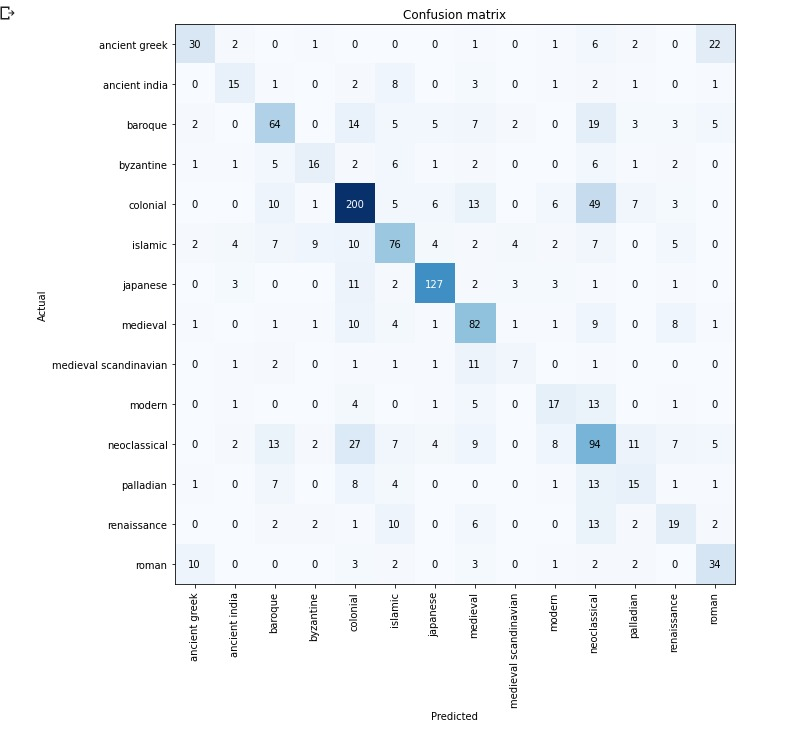

נסתכל על טעויות נפוצות של המסווג:
1. טעויות בין סגנון יווני לרומי - אלה סגנונות דומים מאוד. כמו כן עבור סגנונות אלה רוב התמונות הקיימות הן חורבות ושאריות של המבנה ולכן אנו מאמינים שלמסווג קשה להבדיל ביניהם.
2. טעויות לסגנון ניאוקלאסי - נראה שהרבה סגנונות מסווגים בטעות לסגנון ניאוקלאסי. סגנון זה מאופיין בשימוש במוטיבים ישנים (קלאסיים) וחידושם, לכן טעויות אלה לא מאוד מפתיעות. טעות אחת שהפתיעה אותנו הוא בלבולים בין סגנון ניאוקלאסי לקולוניאלי. כאשר אנו נסתכל על מקבץ של סגנונות אלה אנו נבדיל ביניהם בקלות
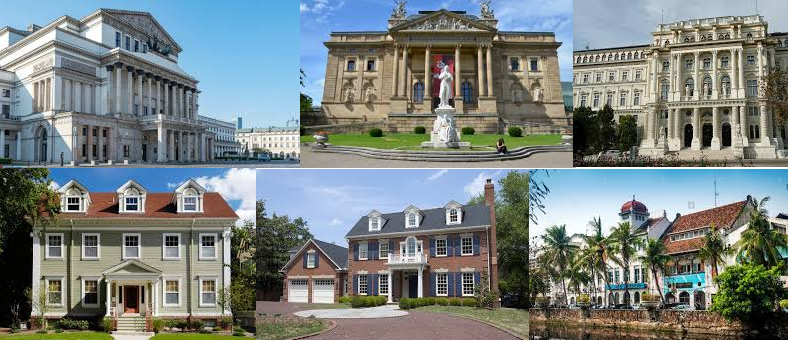
אולם לאחר בחינה מקרוב ניתן למצוא תת מחלקה של סגנון ניאוקלאסי שמזכירה סגנון קולוניאלי: ארכיטקטורה ג'אורג'יאנית
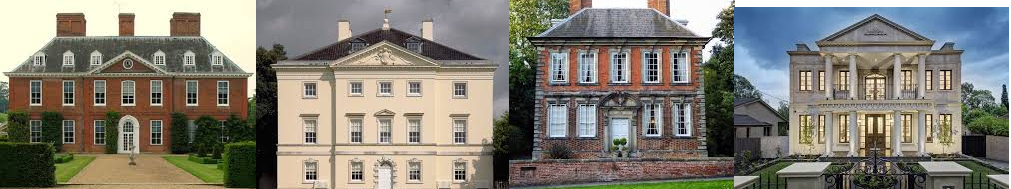
נוכל לתקן זאת בעזרת הוצאת המחלקה.

נציין שמקרים שבהם המסווג טועה בין סגנונות דומים הוא אפקט רצוי - בעזרת אפקט זה נוכל לזהות את כלל ההשפעות שהיו על מבנה מסוים.

## אתגרים עתידיים

ישנן כמה שאלות שיהיה עלינו לפתור על מנת שנגיע למטרתנו. כפי שצוין, אחת המשימות החשובות היא שיפור המסווג, הן בעזרת טיוב המידע והן בהוצאת מחלקות כפי שתואר מקודם. 
שנית, לאחר שנסתפק באיכות המסווג נצטרך למצוא מבנים בעולם שאותם נסווג. הבעיה הקשה היא העובדה שרוב המבנים המודרנים הם שילוב של הרבה סגנונות שרובם אנו לא יודעים לסווג. לכן אנו נצטרך למצוא את המבנים הישנים שיהיו בעלי סגנונות ברורים יותר. 
אתגר שלישי שצפוי לנו הוא מציאת מקור מידע שיכלול את שנת הקמת המבנה. הגישה הנוכחית שלנו היא לסקור דפים של בניינים מפורסמים מויקיפדיה ולשלוף מהטקסט את השנה שבהן בנייתם הסתיימה.